In [1]:
# Numerical Derivatives Group Project 
### Corey Dobbs and Emma Rasmussen 

## Problem 1- Finite Differences

In [2]:
import numpy as np 

# Define y = sin(x)
def y(x):
    y = np.sin(x)
    
    return y

# Define derivative function
def Der(fun, x, h):
    deriv = (fun(x+h) - fun(x -h))/(2*h)

    return deriv 

In [3]:
!pip install autograd

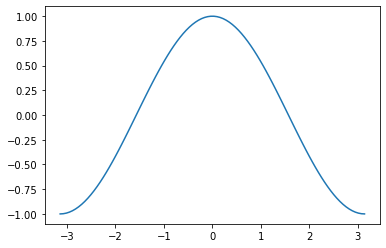

In [22]:
import matplotlib.pyplot as plt
import autograd.numpy as anp
from autograd import grad

def dual(fun, interval, N=100):
    x = np.linspace(interval[0], interval[1], 100)
    deriv  = grad(fun) # Obtain gradient function
    plt.plot(x, list(map(deriv, x)))
    plt.show()

# dual(f, [-np.pi, np.pi], 100) #test
